## 1) Linear Layer

In [1]:
import torch

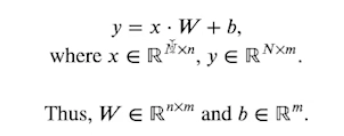

### Raw Linear Layer

In [5]:
# random 초기화가 되면 된다. -> 우리는 임의로 값을 넣어준다.

W = torch.FloatTensor([[1, 2],
                      [3, 4],
                      [5, 6]])

b = torch.FloatTensor([2, 2])

In [6]:
print(W.size())
print(b.size())

torch.Size([3, 2])
torch.Size([2])


n=3, m=2 임을 확인할 수 있다.

In [11]:
# |x| = (N, n) |w| = (n, m) |x,w| = (N,m)

def linear(x, W, b):
    y = torch.matmul(x,W) + b
    
    return y

In [13]:
# x값 선언 
# |x| = (4,3)

x = torch.FloatTensor([[1, 1, 1],
                      [2, 2, 2],
                      [3, 3, 3],
                      [4, 4, 4]])

print(x.size())

torch.Size([4, 3])


In [15]:
# 함수에 넣어서 y값 및 사이즈 출력

y = linear(x, W, b)

print(y)
print(y.size())

tensor([[11., 14.],
        [20., 26.],
        [29., 38.],
        [38., 50.]])
torch.Size([4, 2])


## 2) nn.Module (추상 클래스)


In [18]:
# 앞으로, 배울 뉴럴넷은 이 추상 클래스를 상속받을 것이다.
# 2가지가 중요 ( __init__ , forward 함수)

# 1) __init__ : forward에서 사용할 필요한 것들을 설정하고 선언
# 2) forward : 함수의 지지고 볶는(?) 과정을 정의하는 것

In [19]:
import torch.nn as nn

In [20]:
class MyLinear(nn.Module):   #nn.Module을 상속했다
    
    def __init__ (self, input_dim=3, output_dim=2): 
        
        #self로 객체 저장
        self.input_dim = input_dim
        self.output_dim = output_dim
        
        #상위 메서드 생성자 호출
        super().__init__()
        
        self.W = torch.FloatTensor(input_dim, output_dim)
        self.b = torch.FloatTensor(output_dim)
        
        
    def forward(self, x):
        
        y = torch.matmul(x, self.W) + self.b
        
        return y
    

In [35]:
linear = MyLinear(3,2)
# forward생략하고 파라미터 값만 넣음 된다.
y = linear(x) 

print(y.size())

torch.Size([4, 2])


In [26]:
#.parameters()하면 트레이너러블한 데이터 출력
for p in linear.parameters():
    print(p)

## 3) Correct way : nn.Parameter

- 위에서 짠 코드는 틀린 코드 -> linear.parameters()를 했을 때 나오는 결과물이 없음
- 정확하게 짜기 위해서는? nn.Parameter로 랩핑해주어야 한다!

In [29]:
class MyLinear(nn.Module):
    
    def __init__(self, input_dim = 3, output_dim = 2):
        self.input_dim = input_dim
        self.output_dim = output_dim
        
        super().__init__()
        
        #nn.Parameter add하면 제대로 등록된다.
        self.W = nn.Parameter(torch.FloatTensor(input_dim, output_dim))
        self.b = nn.Parameter(torch.FloatTensor(output_dim))
        
    def forward(self, x):
        # |x| = (batch_size, input_dim)
        y = torch.matmul(x, self.W) + self.b
        
        # |y| = (batch_size, input_dim) * (input_dim, output_dim)
        #     = (batch_size, output_dim)
        
        return y

In [30]:
linear = MyLinear(3, 2)
 
y = linear(x)

In [31]:
print(y.size())

torch.Size([4, 2])


In [34]:
for p in linear.parameters():
    print(p)
    
# 위 : self.W / 아래 : self.b

Parameter containing:
tensor([[1.4013e-45, 1.4013e-45],
        [0.0000e+00, 1.4013e-45],
        [0.0000e+00, 0.0000e+00]], requires_grad=True)
Parameter containing:
tensor([2.7252e+26, 3.0851e+32], requires_grad=True)


## 4) nn.linear( )
위에서는 노가다(?)로 짜보았지만, 실제로 linear layer를 제공하는 nn.linear()가 있다!

In [36]:
linear = nn.Linear(3, 2)

y = linear(x)

In [37]:
print(y.size())

torch.Size([4, 2])


In [38]:
for p in linear.parameters():
    print(p)

Parameter containing:
tensor([[-0.1177,  0.0468, -0.1315],
        [ 0.1859, -0.3147,  0.1367]], requires_grad=True)
Parameter containing:
tensor([-0.5580, -0.4983], requires_grad=True)


실제로 연산시 W^t 상태이기 때문에 출력할 때는 사이즈가 (2, 3)의 형태로 나오게 된다.

## 5) nn.Module can contain other nn.Module's child classes

- nn.Module은 다른 nn.Module을 상속받은 클래스 객체들을 소유할 수 있다.

In [43]:
class MyLinear(nn.Module):
    
    def __init__(self, input_dim=3, output_dim=2):
        self.input_dim = input_dim
        self.output_dim = output_dim
        
        super().__init__()
        
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        # |x| = (batch_size, input_dim)
        y = self.linear(x)
        # |y| = (batch_size, output_dim)
        
        return y

In [44]:
linear = MyLinear(3, 2)

y = linear(x)

In [45]:
print(y.size())

torch.Size([4, 2])


In [46]:
for p in linear.parameters():
    print(p)

Parameter containing:
tensor([[ 0.5053,  0.0558, -0.3771],
        [ 0.4728, -0.4592, -0.1841]], requires_grad=True)
Parameter containing:
tensor([0.3037, 0.2989], requires_grad=True)
